# 1. Data Source and Contents

In [ ]:
!pip install --upgrade pip
!pip install scikit-learn 
!pip install numpy
!pip install pandas

In [109]:
#Import necessary libraries
import time
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
plt.style.use('seaborn-whitegrid')
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
import numpy as np
from sklearn.tree import export_graphviz
from sklearn.metrics import confusion_matrix
import math
from sklearn.metrics import precision_recall_fscore_support

In [110]:
#load the data 
url = 'https://github.com/ArinB/MSBA-CA-03-Decision-Trees/blob/master/census_data.csv?raw=true'

df = pd.read_csv(url, sep=",")

In [111]:
#convert data to string
df.head()

df.loc[:, df.columns != 'y'] = df.loc[:, df.columns != 'y'].astype(str)

#df = df.astype(str)

#replace letters

df.loc[:, df.columns != 'y'] = df.loc[:, df.columns != 'y'].apply(lambda x: x.str.replace('[a-z]\.', '', regex=True))
# Display the updated DataFrame
print(df)

df.head()

      hours_per_week_bin occupation_bin msr_bin capital_gl_bin race_sex_bin  \
0                  31-40      Mid - Low     Mid            > 0         High   
1                   0-30           High    High            = 0         High   
2                  31-40            Low     Mid            = 0         High   
3                  31-40            Low    High            = 0          Mid   
4                  31-40           High    High            = 0          Low   
...                  ...            ...     ...            ...          ...   
48837              31-40           High     Mid            = 0          Mid   
48838              31-40      Mid - Low     Low            = 0          Mid   
48839      41-50 & 61-70           High    High            = 0         High   
48840              31-40      Mid - Low     Low            > 0         High   
48841              51-60           High    High            = 0         High   

      education_num_bin education_bin workclass_bin

,hours_per_week_bin,occupation_bin,msr_bin,capital_gl_bin,race_sex_bin,education_num_bin,education_bin,workclass_bin,age_bin,flag,y
0,31-40,Mid - Low,Mid,> 0,High,13,Bachelors,income,36-40 & 56-60,train,0
1,0-30,High,High,= 0,High,13,Bachelors,income,40-55,train,0
2,31-40,Low,Mid,= 0,High,9-12,Mid,income,36-40 & 56-60,train,0
3,31-40,Low,High,= 0,Mid,0-8,Low,income,40-55,train,0
4,31-40,High,High,= 0,Low,13,Bachelors,income,26-30 & 71-100,train,0


In [112]:
#learn more about the dtypes in the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   hours_per_week_bin  48842 non-null  object
 1   occupation_bin      48842 non-null  object
 2   msr_bin             48842 non-null  object
 3   capital_gl_bin      48842 non-null  object
 4   race_sex_bin        48842 non-null  object
 5   education_num_bin   48842 non-null  object
 6   education_bin       48842 non-null  object
 7   workclass_bin       48842 non-null  object
 8   age_bin             48842 non-null  object
 9   flag                48842 non-null  object
 10  y                   48842 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 4.1+ MB


In [113]:
print("\nData Quality Report")
print("Total records: {}".format(len(df.index)))
data_quality_report


Data Quality Report
Total records: 48842


NameError: name 'data_quality_report' is not defined

In [114]:
#Split the data according the the labels in the y feature

train_data = df[df.flag == 'train']
test_data = df[df.flag == 'test']

In [115]:
df.head()

,hours_per_week_bin,occupation_bin,msr_bin,capital_gl_bin,race_sex_bin,education_num_bin,education_bin,workclass_bin,age_bin,flag,y
0,31-40,Mid - Low,Mid,> 0,High,13,Bachelors,income,36-40 & 56-60,train,0
1,0-30,High,High,= 0,High,13,Bachelors,income,40-55,train,0
2,31-40,Low,Mid,= 0,High,9-12,Mid,income,36-40 & 56-60,train,0
3,31-40,Low,High,= 0,Mid,0-8,Low,income,40-55,train,0
4,31-40,High,High,= 0,Low,13,Bachelors,income,26-30 & 71-100,train,0


In [116]:
#Store the categorical features into a variable 
categorical_feat = ['age_bin','capital_gl_bin','education_bin',
                    'hours_per_week_bin','msr_bin','occupation_bin','race_sex_bin']

In [117]:
#Split the train and test data 
train = df[df['flag']=='train']
test = df[df['flag']=='test']

#Use these catetgorical features in the model
cat_feats = ['age_bin','capital_gl_bin','education_bin','hours_per_week_bin','msr_bin','occupation_bin','race_sex_bin']

#Extract the target variable / dependent variable, y
#Extract the independent variable, x for the trianing and test data 

y_train = train['y']
x_train = train[['age_bin','capital_gl_bin','education_bin','hours_per_week_bin','msr_bin','occupation_bin','race_sex_bin']]
x_train = pd.get_dummies(x_train,columns=cat_feats,drop_first=True)

#Convert the categorical variables into binary variables (vars that can only take two values, true or false or 0 and 1)
#drop_first indicates that one of the binary variables for each cateogry will be 
#dropped to avoid multicolllinearity

y_test = test['y']
x_test = test[['age_bin','capital_gl_bin','education_bin','hours_per_week_bin','msr_bin','occupation_bin','race_sex_bin']]
x_test = pd.get_dummies(x_test,columns=cat_feats,drop_first=True)

   n_estimator  accuracy    recall  precision  f1 score
0            2  0.790799  0.826859   0.835391  0.828667
1            4  0.803329  0.826859   0.835391  0.828667
2            6  0.834715  0.826859   0.835391  0.828667
3            8  0.836681  0.826859   0.835391  0.828667
4           10  0.837786  0.826859   0.835391  0.828667
5           12  0.838278  0.826859   0.835391  0.828667
6           14  0.837786  0.826859   0.835391  0.828667
7           16  0.834838  0.826859   0.835391  0.828667
8           18  0.835268  0.826859   0.835391  0.828667
9           20  0.835882  0.826859   0.835391  0.828667


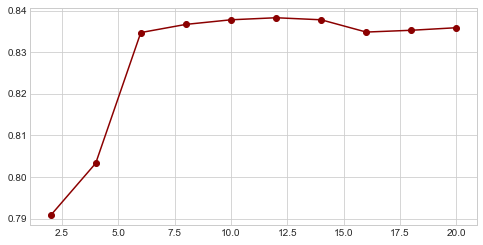

In [118]:
results = []
metrics = {'n_estimator':[],'accuracy': [], 'recall': [], 'precision': [], 'f1 score': []}

max_depth_options = [2,4,6,8,10,12,14,16,18,20]
for trees in max_depth_options:
    model = DecisionTreeClassifier(max_depth= trees, random_state =101)
    model.fit(x_train, y_train)
    y_pred=model.predict(x_test)
    accuracy = np.mean(y_test ==y_pred)
    results.append(accuracy)
    metrics['n_estimator'].append(trees)
    metrics['accuracy'].append(accuracy)
    metrics['recall'].append(recall)
    metrics['precision'].append(precision)
    metrics['f1 score'].append(f1_score)
    
plt.figure(figsize = (8,4))
pd.Series(results, max_depth_options).plot(color='darkred', marker = 'o')
random_forest_table = pd.DataFrame(metrics)
print(random_forest_table)

# 3. Building a Random Forest Model
    1. Write your observations about the Classifier’s behavior with respect to the number
    of estimators
    Accuracy fluncuates when different n_estimators are tested. It reaches its second highest peak at the first n_estimator, 50 and drastically declines until 250 , where it gradually increases and reaches its highest peak at 500. Meaning that this is the most optimal hyperameter for this algorithim.  
    
    2. Is there an optimal value of the estimator within the given range?
    The optimal n_estimator 
    
    The most optimal n_estimator is 500, as that is where accuracy pepaks. Accuracy, recall, precision and f1 score performed quite similarly (.84<.83). However, the classifier performed best in terms of accuracy (0.839015) and precision (0.835391).

In [119]:
#import features to help evaluate and visualize AUC
from sklearn.metrics import roc_auc_score
from sklearn.metrics import plot_roc_curve

Randomforest

   n_estimator  accuracy    recall  precision  f1 score
0           50  0.838953  0.826859   0.835391  0.828667
1          100  0.838462  0.826859   0.835391  0.828667
2          150  0.838339  0.826859   0.835391  0.828667
3          200  0.837725  0.826859   0.835391  0.828667
4          250  0.837786  0.826859   0.835391  0.828667
5          300  0.838646  0.826859   0.835391  0.828667
6          350  0.838462  0.826859   0.835391  0.828667
7          400  0.838769  0.826859   0.835391  0.828667
8          450  0.838831  0.826859   0.835391  0.828667
9          500  0.839015  0.826859   0.835391  0.828667


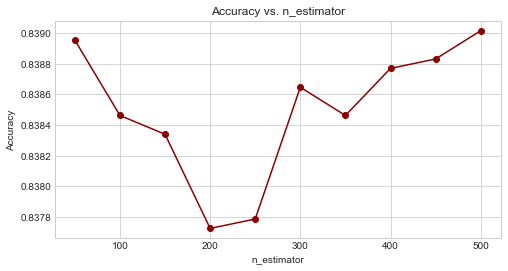

In [120]:
#import random forest classifier
from sklearn.ensemble import RandomForestClassifier

#create a dictionary where values can be stored during each iteration of the for loop 
metrics = {'n_estimator':[],'accuracy': [], 'recall': [], 'precision': [], 'f1 score': []}

#use the for loop to trian the model and store values to the dictionary 
results = []
n_estimator = [50,100,150,200,250,300,350,400,450,500]
for trees in n_estimator:
    model = RandomForestClassifier(n_estimators=trees,random_state=101)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = np.mean(y_test == y_pred)
    results.append(accuracy)
    metrics['n_estimator'].append(trees)
    metrics['accuracy'].append(accuracy)
    metrics['recall'].append(recall)
    metrics['precision'].append(precision)
    metrics['f1 score'].append(f1_score)
    
#plot Accuracy vs. n_estimator, the hyperameter to see which hyperamter value yeilds the best accuracy results
plt.figure(figsize = (8,4))
pd.Series(results, n_estimator).plot(color='darkred', marker = 'o').set(xlabel = 'n_estimator', ylabel = 'Accuracy', title = 'Accuracy vs. n_estimator')

#use a table to help determine which n_estimator value is the best 
random_forest_table = pd.DataFrame(metrics)
print(random_forest_table)

   n_estimator  train_auc  test_auc
0           50   0.786143  0.749012
1          100   0.783879  0.746984
2          150   0.784358  0.747173
3          200   0.784358  0.746592
4          250   0.782834  0.745195
5          300   0.783835  0.746926
6          350   0.785141  0.748242
7          400   0.783313  0.747455
8          450   0.783269  0.747405
9          500   0.783182  0.747167


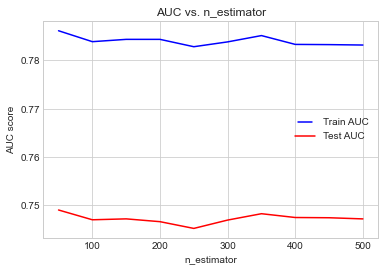

In [122]:
#graph auc vs n_estimator (random forest)

# Generate the false positive rate, true positive rate, and thresholds for ROC
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)

#set hyperamter values to be tested 
n_estimators = [50,100,150,200,250,300,350,400,450,500]
train_results = []
test_results = []


#store results from the for loop into a dictionary
auc_scores = {'n_estimator': [], 'train_auc': [], 'test_auc': []}


#use a for loop to iterate through each n_estimator value and train and test the data against the model to calculate the auc  
for trees in n_estimators:
   model = RandomForestClassifier(n_estimators = trees, random_state = 101)
   model.fit(x_train, y_train)
   train_pred = model.predict(x_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   train_roc_auc = auc(false_positive_rate, true_positive_rate)
   # Add auc score to previous train results
   train_results.append(train_roc_auc)
   y_pred = model.predict(x_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   test_roc_auc = auc(false_positive_rate, true_positive_rate)
   # Add auc score to previous test results
   test_results.append(test_roc_auc)

# Append the n_estimator value and corresponding AUC scores to the dictionary
   auc_scores['n_estimator'].append(trees)
   auc_scores['train_auc'].append(train_roc_auc)
   auc_scores['test_auc'].append(test_roc_auc)

#use a table to help determine which n_estimator value is the best 
rf_table_auc = pd.DataFrame(auc_scores)
print(rf_table_auc)


#plot auc against train and test results 
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(n_estimator, train_results, 'b', label= 'Train AUC')
line2, = plt.plot(n_estimator, test_results, 'r', label= 'Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('n_estimator')
plt.title('AUC vs. n_estimator')
plt.show()

# 4. Building AdaBoost, Gradient Boost, and XGB.

Adaboost

   n_estimator  accuracy    recall  precision  f1 score
0           50  0.843499  0.826859   0.835391  0.828667
1          100  0.845218  0.826859   0.835391  0.828667
2          150  0.845034  0.826859   0.835391  0.828667
3          200  0.844973  0.826859   0.835391  0.828667
4          250  0.844850  0.826859   0.835391  0.828667
5          300  0.845096  0.826859   0.835391  0.828667
6          350  0.845157  0.826859   0.835391  0.828667
7          400  0.845157  0.826859   0.835391  0.828667
8          450  0.845157  0.826859   0.835391  0.828667
9          500  0.845157  0.826859   0.835391  0.828667


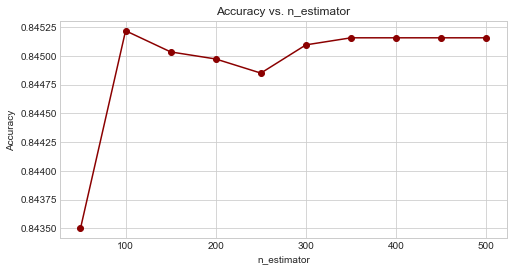

In [123]:
#fit the data to the adaboost model
from sklearn.ensemble import AdaBoostClassifier

#create a dictionary where values can be stored during each iteration of the for loop 
metrics = {'n_estimator':[],'accuracy': [], 'recall': [], 'precision': [], 'f1 score': []}

#use an empty list to store the results of every run with each n_estimator value
results = []
n_estimator = [50,100,150,200,250,300,350,400,450,500]

#use a for loop to iterate through each n_estimator value and train and test the data against the mdoel 
for trees in n_estimator:
    model = AdaBoostClassifier(n_estimators=trees,random_state=101)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = np.mean(y_test == y_pred)
    results.append(accuracy)
    metrics['n_estimator'].append(trees)
    metrics['accuracy'].append(accuracy)
    metrics['recall'].append(recall)
    metrics['precision'].append(precision)
    metrics['f1 score'].append(f1_score)
    
#plot Accuracy vs. n_estimator, the hyperameter to see which hyperamter yeilds the best accuracy results
plt.figure(figsize = (8,4))
pd.Series(results, n_estimator).plot(color='darkred', marker = 'o').set(xlabel = 'n_estimator', ylabel = 'Accuracy', title = 'Accuracy vs. n_estimator')

#use a table to help determine which n_estimator value is the best 
adaboost_table = pd.DataFrame(metrics)
print(adaboost_table)

   n_estimator  train_auc  test_auc
0           50   0.741405  0.740404
1          100   0.739517  0.741171
2          150   0.746504  0.746617
3          200   0.746437  0.746398
4          250   0.746501  0.746407
5          300   0.746391  0.746388
6          350   0.746200  0.746518
7          400   0.746200  0.746518
8          450   0.746200  0.746518
9          500   0.746200  0.746518


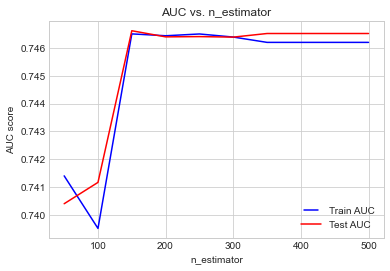

In [125]:
#graph auc vs n_estimator (adaboost)

# Generate the false positive rate, true positive rate, and thresholds for ROC
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)

#set hyperamter values to be tested 
n_estimators = [50,100,150,200,250,300,350,400,450,500]
train_results = []
test_results = []

#create an empty dictionary where values can be stored from the for loop and later inputted into a table
auc_scores = {'n_estimator': [], 'train_auc': [], 'test_auc': []}


#use a for loop to iterate through each n_estimator value and train and test the data against the model to calculate the auc  
for trees in n_estimators:
   model = AdaBoostClassifier(n_estimators = trees, random_state = 101)
   model.fit(x_train, y_train)
   train_pred = model.predict(x_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   train_roc_auc = auc(false_positive_rate, true_positive_rate)
   # Add auc score to previous train results
   train_results.append(train_roc_auc)
   y_pred = model.predict(x_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   test_roc_auc = auc(false_positive_rate, true_positive_rate)
   # Add auc score to previous test results
   test_results.append(test_roc_auc)

# Append the n_estimator value and corresponding AUC scores to the dictionary
   auc_scores['n_estimator'].append(trees)
   auc_scores['train_auc'].append(train_roc_auc)
   auc_scores['test_auc'].append(test_roc_auc)

#use a table to help determine which n_estimator value is the best 
rf_table_auc = pd.DataFrame(auc_scores)
print(rf_table_auc)

#plot auc vs n_estimator for training and test data
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(n_estimator, train_results, 'b', label= 'Train AUC')
line2, = plt.plot(n_estimator, test_results, 'r', label= 'Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('n_estimator')
plt.title('AUC vs. n_estimator')
plt.show()

Gradient Boost

   n_estimator  accuracy    recall  precision  f1 score
0           50  0.842762  0.826859   0.835391  0.828667
1          100  0.845710  0.826859   0.835391  0.828667
2          150  0.845771  0.826859   0.835391  0.828667
3          200  0.846508  0.826859   0.835391  0.828667
4          250  0.846140  0.826859   0.835391  0.828667
5          300  0.845955  0.826859   0.835391  0.828667
6          350  0.845955  0.826859   0.835391  0.828667
7          400  0.845710  0.826859   0.835391  0.828667
8          450  0.845833  0.826859   0.835391  0.828667
9          500  0.846140  0.826859   0.835391  0.828667


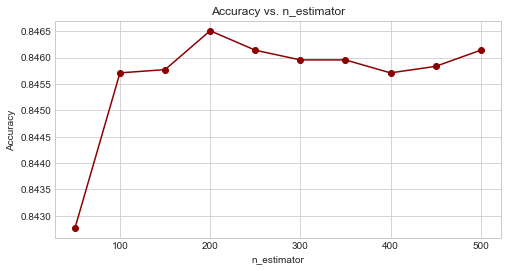

In [126]:
#fit the data to the gradient boosting model
from sklearn.ensemble import GradientBoostingClassifier

#create a dictionary where values can be stored during each iteration of the for loop 
metrics = {'n_estimator':[],'accuracy': [], 'recall': [], 'precision': [], 'f1 score': []}
results = []
n_estimator = [50,100,150,200,250,300,350,400,450,500]

#use a for loop to iterate through each n_estimator value and train and test the data against the mdoel 
for trees in n_estimator:
    model = GradientBoostingClassifier(n_estimators=trees,random_state=101)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = np.mean(y_test == y_pred)
    results.append(accuracy)
    metrics['n_estimator'].append(trees)
    metrics['accuracy'].append(accuracy)
    metrics['recall'].append(recall)
    metrics['precision'].append(precision)
    metrics['f1 score'].append(f1_score)
    
#plot Accuracy vs. n_estimator, the hyperameter to see which hyperamter yeilds the best accuracy results
plt.figure(figsize = (8,4))
pd.Series(results, n_estimator).plot(color='darkred', marker = 'o').set(xlabel = 'n_estimator', ylabel = 'Accuracy', title = 'Accuracy vs. n_estimator')

#use a table to help determine which n_estimator value is the best 
gradient_boosting_table = pd.DataFrame(metrics)
print(gradient_boosting_table)

   n_estimator  train_auc  test_auc
0           50   0.725198  0.724117
1          100   0.749924  0.748856
2          150   0.753764  0.751051
3          200   0.757601  0.756203
4          250   0.759671  0.756321
5          300   0.761168  0.757817
6          350   0.761748  0.758266
7          400   0.762192  0.757745
8          450   0.761890  0.757826
9          500   0.762185  0.758027


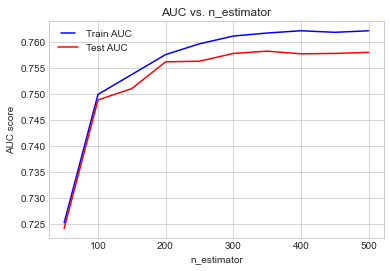

In [128]:
#graph auc vs n_estimator (gradient)

# Generate the false positive rate, true positive rate, and thresholds for ROC
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)

#set hyperamter values to be tested 
n_estimators = [50,100,150,200,250,300,350,400,450,500]
train_results = []
test_results = []

#create an empty dictionary where values can be stored from the for loop and later inputted into a table
auc_scores = {'n_estimator': [], 'train_auc': [], 'test_auc': []}

#use a for loop to iterate through each n_estimator value and train and test the data against the model to calculate the auc  
for trees in n_estimators:
   model = GradientBoostingClassifier(n_estimators = trees, random_state = 101)
   model.fit(x_train, y_train)
   train_pred = model.predict(x_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   train_roc_auc = auc(false_positive_rate, true_positive_rate)
   # Add auc score to previous train results
   train_results.append(train_roc_auc)
   y_pred = model.predict(x_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   test_roc_auc = auc(false_positive_rate, true_positive_rate)
   # Add auc score to previous test results
   test_results.append(test_roc_auc)
    
#Append the n_estimator value and corresponding AUC scores to the dictionary
   auc_scores['n_estimator'].append(trees)
   auc_scores['train_auc'].append(train_roc_auc)
   auc_scores['test_auc'].append(test_roc_auc)

#use a table to help determine which n_estimator value is the best 
rf_table_auc = pd.DataFrame(auc_scores)
print(rf_table_auc)

#plot auc vs n_estimator for training and test data
line1, = plt.plot(n_estimator, train_results, 'b', label= 'Train AUC')
line2, = plt.plot(n_estimator, test_results, 'r', label= 'Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('n_estimator')
plt.title('AUC vs. n_estimator')
plt.show()

In [131]:
#install xgboost in order to use the xgboost model 
!pip install xgboost


[notice] A new release of pip is available: 23.0 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


   n_estimator  accuracy    recall  precision  f1 score
0           50  0.844788  0.826859   0.835391  0.828667
1          100  0.844604  0.826859   0.835391  0.828667
2          150  0.844051  0.826859   0.835391  0.828667
3          200  0.843437  0.826859   0.835391  0.828667
4          250  0.842762  0.826859   0.835391  0.828667
5          300  0.842700  0.826859   0.835391  0.828667
6          350  0.841840  0.826859   0.835391  0.828667
7          400  0.841717  0.826859   0.835391  0.828667
8          450  0.840182  0.826859   0.835391  0.828667
9          500  0.840120  0.826859   0.835391  0.828667


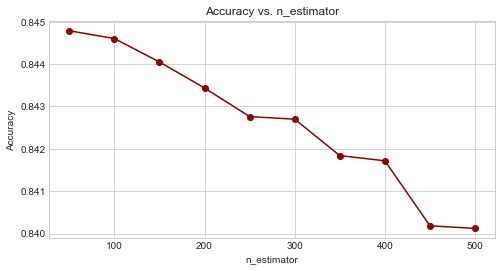

In [132]:
#fit the data to the xgboost model 
import xgboost as xgb

#create a dictionary where values can be stored during each iteration of the for loop 
metrics = {'n_estimator':[],'accuracy': [], 'recall': [], 'precision': [], 'f1 score': []}
results = []
n_estimator = [50,100,150,200,250,300,350,400,450,500]

#use a for loop to iterate through each n_estimator value and train and test the data against the mdoel 
for trees in n_estimator:
    model = xgb.XGBClassifier(n_estimators=trees,random_state=101)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = np.mean(y_test == y_pred)
    results.append(accuracy)
    metrics['n_estimator'].append(trees)
    metrics['accuracy'].append(accuracy)
    metrics['recall'].append(recall)
    metrics['precision'].append(precision)
    metrics['f1 score'].append(f1_score)
    
#plot Accuracy vs. n_estimator, the hyperameter to see which hyperamter yeilds the best accuracy results
plt.figure(figsize = (8,4))
pd.Series(results, n_estimator).plot(color='darkred', marker = 'o').set(xlabel = 'n_estimator', ylabel = 'Accuracy', title = 'Accuracy vs. n_estimator')

#use a table to help determine which n_estimator value is the best 
xgb_boost_table = pd.DataFrame(metrics)
print(xgb_boost_table)

   n_estimator  train_auc  test_auc
0           50   0.769419  0.756155
1          100   0.773997  0.757381
2          150   0.776753  0.757019
3          200   0.778121  0.757246
4          250   0.779066  0.756893
5          300   0.780103  0.756404
6          350   0.779142  0.753147
7          400   0.779147  0.753336
8          450   0.781427  0.752061
9          500   0.781830  0.752111


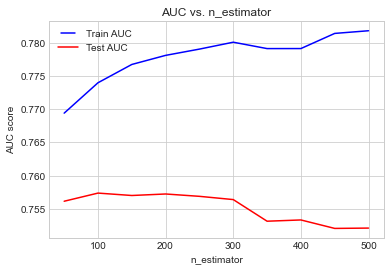

In [133]:
#graph auc vs n_estimator (xgboost)

# Generate the false positive rate, true positive rate, and thresholds for ROC
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)

#set hyperamter values to be tested 
n_estimators = [50,100,150,200,250,300,350,400,450,500]
train_results = []
test_results = []

#create an empty dictionary where values can be stored from the for loop and later inputted into a table
auc_scores = {'n_estimator': [], 'train_auc': [], 'test_auc': []}

#use a for loop to iterate through each n_estimator value and train and test the data against the model to calculate the auc  
for trees in n_estimators:
   model = xgb.XGBClassifier(n_estimators = trees, random_state = 101)
   model.fit(x_train, y_train)
   train_pred = model.predict(x_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   train_roc_auc = auc(false_positive_rate, true_positive_rate)
   # Add auc score to previous train results
   train_results.append(train_roc_auc)
   y_pred = model.predict(x_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   test_roc_auc = auc(false_positive_rate, true_positive_rate)
   # Add auc score to previous test results
   test_results.append(test_roc_auc)

# Append the n_estimator value and corresponding AUC scores to the dictionary
   auc_scores['n_estimator'].append(trees)
   auc_scores['train_auc'].append(train_roc_auc)
   auc_scores['test_auc'].append(test_roc_auc)

#use a table to help determine which n_estimator value is the best 
rf_table_auc = pd.DataFrame(auc_scores)
print(rf_table_auc)

#plot auc scores against the n_estimator 
line1, = plt.plot(n_estimator, train_results, 'b', label= 'Train AUC')
line2, = plt.plot(n_estimator, test_results, 'r', label= 'Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('n_estimator')
plt.title('AUC vs. n_estimator')
plt.show()

   n_estimator  train_auc  test_auc
0           50   0.725198  0.724117
1          100   0.749924  0.748856
2          150   0.753764  0.751051
3          200   0.757601  0.756203
4          250   0.759671  0.756321
5          300   0.761168  0.757817
6          350   0.761748  0.758266
7          400   0.762192  0.757745
8          450   0.761890  0.757826
9          500   0.762185  0.758027


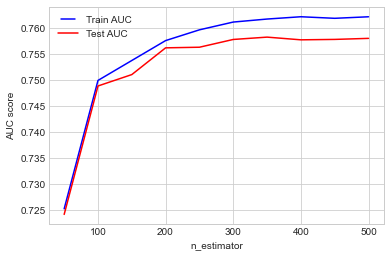

In [134]:
#graph auc vs n_estimator (gradient)

# Generate the false positive rate, true positive rate, and thresholds for ROC
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)

#set hyperamter values to be tested 
n_estimators = [50,100,150,200,250,300,350,400,450,500]
train_results = []
test_results = []

#create an empty dictionary where values can be stored from the for loop and later inputted into a table
auc_scores = {'n_estimator': [], 'train_auc': [], 'test_auc': []}

#use a for loop to iterate through each n_estimator value and train and test the data against the model to calculate the auc  
for trees in n_estimators:
   model = GradientBoostingClassifier(n_estimators = trees, random_state = 101)
   model.fit(x_train, y_train)
   train_pred = model.predict(x_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   train_roc_auc = auc(false_positive_rate, true_positive_rate)
   # Add auc score to previous train results
   train_results.append(train_roc_auc)
   y_pred = model.predict(x_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   test_roc_auc = auc(false_positive_rate, true_positive_rate)
   #Add auc score to previous test results
   test_results.append(test_roc_auc)

    #Append the n_estimator value and corresponding AUC scores to the dictionary
   auc_scores['n_estimator'].append(trees)
   auc_scores['train_auc'].append(train_roc_auc)
   auc_scores['test_auc'].append(test_roc_auc)

#use a table to help determine which n_estimator value is the best 
rf_table_auc = pd.DataFrame(auc_scores)
print(rf_table_auc)

#plot auc scores against the n_estimator hyperameter
line1, = plt.plot(n_estimator, train_results, 'b', label= 'Train AUC')
line2, = plt.plot(n_estimator, test_results, 'r', label= 'Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('n_estimator')
plt.show()

# 5. Compare Performance

In [135]:
#store the best values from each run into a dictionary in order to clearly visualize which algorithim perfomed the best. 
best_scores = [
    {'model': 'Random Forest', 'accuracy': 0.839015, 'auc':0.786143},
    {'model': 'Adaboost', 'accuracy': 0.845218, 'auc': 0.746504},
    {'model': 'Gradient Boosting', 'accuracy': 0.845218, 'auc':0.762192},
    {'model': 'XGB', 'accuracy':0.844788 , 'auc':0.781427},]
    
best_scores_table = pd.DataFrame(best_scores)

best_scores_table = best_scores_table.set_index('model').T
    
print(best_scores_table)

model     Random Forest  Adaboost  Gradient Boosting       XGB
accuracy       0.839015  0.845218           0.845218  0.844788
auc            0.786143  0.746504           0.762192  0.781427


Below is my attempt to make a prediction. Unfortunately, I was not able to figure this part out.

Q.8 What is the probability that your prediction for this person is correct?

The probability that my predicition is correct is 0 because I wasn't able to figure out the code. However, if I did figure out the code, I would say that there's a 84% chance that 
my predicition is accurate, due the performance metrics, more specifically, the accuracy measurement of my model.

In [136]:
#Create a new dataframe with new variables

new_df = pd.DataFrame.from_dict({'hours_per_week_bin':['41-50'],
          'occupation_bin':['Mid-Low'], 'msr_bin': ['High'],
               'capital_gl_bin':['> 0'], 'race_sex_bin':['Mid'],
               'education_num_bin':['9-12'], 'education_bin':['High'],
               'workclass_bin':['Income'],'age_bin':['41-50'],'flag':['train'],
               'y': [0]})

new_df

,hours_per_week_bin,occupation_bin,msr_bin,capital_gl_bin,race_sex_bin,education_num_bin,education_bin,workclass_bin,age_bin,flag,y
0,41-50,Mid-Low,High,> 0,Mid,9-12,High,Income,41-50,train,0


In [137]:
#encode the data 
encoded_new_df = pd.get_dummies(new_df, columns = categorical_cols)


NameError: name 'categorical_cols' is not defined

In [ ]:
# Create a single-record DataFrame with the preprocessed data
new_person = encoded_new_df.reindex(columns=categorical_cols, fill_value=0)

# Use the trained model to predict the income category for the new individual
prediction = model.predict(new_person)

In [ ]:
# concatenate new data with training data
full_df = pd.concat([new_df, df], ignore_index=True)

# encode categorical variables
encoded_df = pd.get_dummies(full_df, columns=categorical_cols)

# extract the new person data
new_person = encoded_df.loc[0].reindex(columns, fill_value=0)

# predict the income category
prediction = model.predict([new_person])